# Now we will start doing pre-processing on thyroid data to prepare our dataset for model building

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
df=pd.read_csv('thyroid.csv')

In [3]:
df.sample(5)

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,FTI_measured,TBG_measured,referral_source,age,TSH,T3,TT4,T4U,FTI,Target
1002,M,t,f,f,f,f,f,f,f,f,...,t,f,other,51,0.005,2.8,132,0.95,139,negative
545,M,f,f,f,f,f,f,f,f,f,...,t,f,SVHC,56,0.520,2.4,158,1.18,134,negative
2613,M,f,f,f,f,f,f,f,f,f,...,t,f,other,56,0.050,0.7,50,0.25,205,negative
2074,F,f,f,f,f,f,f,f,f,f,...,t,f,SVI,54,3.100,3.8,157,1.52,103,negative
154,F,f,f,f,f,f,f,f,f,f,...,t,f,other,74,1.300,2.3,113,0.96,118,negative


Now we are going to remove unneccessary columns 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643 entries, 0 to 2642
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        2643 non-null   object 
 1   on_thyroxine               2643 non-null   object 
 2   query_on_thyroxine         2643 non-null   object 
 3   on_antithyroid_medication  2643 non-null   object 
 4   sick                       2643 non-null   object 
 5   pregnant                   2643 non-null   object 
 6   thyroid_surgery            2643 non-null   object 
 7   I131_treatment             2643 non-null   object 
 8   query_hypothyroid          2643 non-null   object 
 9   query_hyperthyroid         2643 non-null   object 
 10  lithium                    2643 non-null   object 
 11  goitre                     2643 non-null   object 
 12  tumor                      2643 non-null   object 
 13  hypopituitary              2643 non-null   objec

In [5]:
df=df.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis=1)

Now We are going to map:
{ 'f' : 0 and 't' : 1}
{ 'F' : 0 and 'M' : 1}

In [6]:
col=['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych']

for column in col:
    df[column]=df[column].map({'f':0,'t':1})

In [7]:
df['sex']=df['sex'].map({'F' : 0, 'M':1})

In [8]:
df.sample(2)

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,hypopituitary,psych,referral_source,age,TSH,T3,TT4,T4U,FTI,Target
939,0,0,0,0,0,0,0,0,0,0,...,0,0,SVI,68,16.0,1.4,68,1.01,67,compensated_hypothyroid
2093,0,0,0,0,0,0,0,0,0,0,...,0,0,other,28,5.9,2.0,126,1.26,100,negative


In [9]:
df['referral_source'].value_counts()

other    1237
SVI       929
SVHC      359
STMW       84
SVHD       34
Name: referral_source, dtype: int64

In [10]:
# referral_source is not that great to be used for prediction
df=df.drop('referral_source',axis=1)
df

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,tumor,hypopituitary,psych,age,TSH,T3,TT4,T4U,FTI,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,41,1.30,2.5,125,1.14,109,negative
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,70,0.72,1.2,61,0.87,70,negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,80,2.20,0.6,80,0.70,115,negative
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,66,0.60,2.2,123,0.93,132,negative
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,68,2.40,1.6,83,0.89,93,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,19,8.80,2.7,108,1.11,97,compensated_hypothyroid
2639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,68,1.00,2.1,124,1.08,114,negative
2640,0,0,0,0,0,0,0,0,0,1,...,0,0,0,74,5.10,1.8,112,1.07,105,negative
2641,1,0,0,0,0,0,0,0,0,0,...,0,0,0,72,0.70,2.0,82,0.94,87,negative


In [11]:
# as only one column is left so we we will apply label encoder in it!
lb=LabelEncoder()
df['Target']=lb.fit_transform(df['Target'])

# Now we need to scale our data specially for numerical features:
age,tsh,t4u,tt4,fti,t3

In [12]:
# first we will going to use MinMax scaler
xmms=df.iloc[ : ,15:21]
ymms=df['Target']

In [13]:
print(xmms.shape)
print(ymms.shape)

(2643, 6)
(2643,)


In [14]:
x_train,x_test,y_train,y_test=train_test_split(xmms,ymms,random_state=45)

In [15]:
mms=MinMaxScaler()
mms.fit(x_train)
x_train_mms=mms.transform(x_train)
x_test_mms=mms.transform(x_test)

In [16]:
x_train_mms


array([[1.51982379e-01, 1.50001415e-03, 2.07100592e-01, 1.86915888e-01,
        2.78074866e-01, 2.67175573e-01],
       [1.80616740e-01, 3.38682440e-03, 2.78106509e-01, 2.28971963e-01,
        4.11764706e-01, 2.44274809e-01],
       [1.18942731e-01, 3.67927999e-04, 2.07100592e-01, 1.16822430e-01,
        3.74331551e-01, 1.34860051e-01],
       ...,
       [6.16740088e-02, 1.16038831e-03, 4.43786982e-01, 4.88317757e-01,
        8.71657754e-01, 2.79898219e-01],
       [6.38766520e-02, 6.60289248e-02, 1.59763314e-01, 1.77570093e-01,
        3.90374332e-01, 1.98473282e-01],
       [9.69162996e-02, 3.67927999e-04, 2.07100592e-01, 2.14953271e-01,
        3.15508021e-01, 2.77353690e-01]])

In [17]:
x_test_mms.shape

(661, 6)

In [18]:
x_train_mms=pd.DataFrame(x_train_mms,columns=['age','TSH','T3','TT4','T4U','FTI'])


In [19]:
x_test_mms=pd.DataFrame(x_test_mms,columns=['age','TSH','T3','TT4','T4U','FTI'])

In [20]:
dfnum=pd.concat([x_train_mms,x_test_mms],ignore_index=True)
dfnum

,age,TSH,T3,TT4,T4U,FTI
0,0.151982,0.001500,0.207101,0.186916,0.278075,0.267176
1,0.180617,0.003387,0.278107,0.228972,0.411765,0.244275
2,0.118943,0.000368,0.207101,0.116822,0.374332,0.134860
3,0.154185,0.000047,0.443787,0.394860,0.470588,0.379135
4,0.057269,0.002821,0.254438,0.420561,0.598930,0.333333
...,...,...,...,...,...,...
2638,0.174009,0.004708,0.207101,0.257009,0.395722,0.282443
2639,0.103524,0.002255,0.289941,0.184579,0.352941,0.221374
2640,0.138767,0.000085,0.360947,0.390187,0.513369,0.351145
2641,0.059471,0.004142,0.254438,0.186916,0.368984,0.216285


In [21]:
# now we are going to drop num columns from original dataset to append scaled data
df=df.drop(['age','TSH','T3','TT4','T4U','FTI','Target'],axis=1)

In [22]:
dfnum.reset_index(drop=True,inplace=True)
df.reset_index(drop=True,inplace=True)

In [23]:
datamms=pd.concat([df,dfnum],axis=1)

In [24]:
datamms

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,goitre,tumor,hypopituitary,psych,age,TSH,T3,TT4,T4U,FTI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.151982,0.001500,0.207101,0.186916,0.278075,0.267176
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.180617,0.003387,0.278107,0.228972,0.411765,0.244275
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.118943,0.000368,0.207101,0.116822,0.374332,0.134860
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.154185,0.000047,0.443787,0.394860,0.470588,0.379135
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.057269,0.002821,0.254438,0.420561,0.598930,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.174009,0.004708,0.207101,0.257009,0.395722,0.282443
2639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.103524,0.002255,0.289941,0.184579,0.352941,0.221374
2640,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.138767,0.000085,0.360947,0.390187,0.513369,0.351145
2641,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.059471,0.004142,0.254438,0.186916,0.368984,0.216285


In [25]:
datamms['Target']=ymms

In [26]:
# final dataset after min max scaling
datamms.sample(5)

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,tumor,hypopituitary,psych,age,TSH,T3,TT4,T4U,FTI,Target
1505,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0.063877,0.001425,0.396450,0.296729,0.684492,0.208651,1
1260,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0.041850,0.001689,0.278107,0.282710,0.395722,0.312977,1
2135,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0.107930,0.005840,0.218935,0.175234,0.294118,0.241730,1
373,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0.147577,0.002443,0.230769,0.301402,0.438503,0.305344,0
102,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.151982,0.000179,0.207101,0.392523,0.395722,0.430025,1


Now we will apply robust scaling on the dataset bcoz we also have very outliers it will help in adjusting that

In [27]:
print(xmms.shape)
print(ymms.shape)

(2643, 6)
(2643,)


In [28]:
x_train,x_test,y_train,y_test=train_test_split(xmms,ymms,random_state=45)

In [29]:
scaler=RobustScaler()
scaler.fit(x_train)
x_train_rb=scaler.transform(x_train)
x_test_rb=scaler.transform(x_test)

In [30]:
x_train_rb.shape

(1982, 6)

In [31]:
x_test_rb.shape

(661, 6)

In [32]:
# we have to xonvert both of them into a dataframe
x_train_rb=pd.DataFrame(x_train_rb,columns=['age','TSH','T3','TT4','T4U','FTI'])
x_test_rb=pd.DataFrame(x_test_rb,columns=['age','TSH','T3','TT4','T4U','FTI'])

In [33]:
# now merging both the scaled versions
dfn=pd.concat([x_train_rb,x_test_rb],ignore_index=True)
dfn

,age,TSH,T3,TT4,T4U,FTI
0,0.440945,-0.250,-0.250,-0.567568,-1.000000,0.033333
1,0.850394,0.250,0.500,-0.081081,0.190476,-0.266667
2,-0.031496,-0.550,-0.250,-1.378378,-0.142857,-1.700000
3,0.472441,-0.635,2.250,1.837838,0.714286,1.500000
4,-0.913386,0.100,0.250,2.135135,1.857143,0.900000
...,...,...,...,...,...,...
2638,0.755906,0.600,-0.250,0.243243,0.047619,0.233333
2639,-0.251969,-0.050,0.625,-0.594595,-0.333333,-0.566667
2640,0.251969,-0.625,1.375,1.783784,1.095238,1.133333
2641,-0.881890,0.450,0.250,-0.567568,-0.190476,-0.633333


In [34]:
datarb=pd.concat([df,dfn],axis=1)

In [35]:
datarb['Target']=ymms

In [36]:
# final dataframe after applying robust scaling
datarb.describe()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,tumor,hypopituitary,psych,age,TSH,T3,TT4,T4U,FTI,Target
count,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,...,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000
mean,0.332577,0.100643,0.009081,0.012486,0.042754,0.015513,0.012486,0.015134,0.055240,0.061672,...,0.021945,0.000378,0.064321,-0.091914,1.867989,0.001438,0.131290,0.074526,0.114491,0.979190
std,0.471225,0.300913,0.094876,0.111061,0.202341,0.123603,0.111061,0.122110,0.228492,0.240605,...,0.146531,0.019451,0.245370,0.641511,11.987426,1.029768,0.958465,0.935451,1.082529,0.287156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.732283,-0.647500,-2.437500,-2.729730,-3.476190,-3.466667,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.598425,-0.400000,-0.625000,-0.405405,-0.523810,-0.433333,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.031496,0.000000,0.000000,0.000000,0.000000,0.033333,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.409449,0.650000,0.375000,0.567568,0.523810,0.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,12.566929,264.350000,10.750000,8.837838,5.428571,9.633333,3.000000


In [37]:
datamms.describe()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,tumor,hypopituitary,psych,age,TSH,T3,TT4,T4U,FTI,Target
count,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,...,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000,2643.000000
mean,0.332577,0.100643,0.009081,0.012486,0.042754,0.015513,0.012486,0.015134,0.055240,0.061672,...,0.021945,0.000378,0.064321,0.114717,0.009493,0.230905,0.247331,0.398744,0.273371,0.979190
std,0.471225,0.300913,0.094876,0.111061,0.202341,0.123603,0.111061,0.122110,0.228492,0.240605,...,0.146531,0.019451,0.245370,0.044863,0.045236,0.097493,0.082858,0.105051,0.082636,0.287156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.079295,0.000934,0.171598,0.200935,0.331551,0.231552,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.118943,0.002443,0.230769,0.235981,0.390374,0.267176,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.149780,0.004896,0.266272,0.285047,0.449198,0.310433,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.248521,1.000000,1.000000,1.000000,3.000000


In [38]:
dmms=datamms.copy()
drb=datarb.copy()

Till now we have Saved our scaled data into different dataframes variables, Now we will going to proceed with Feature selection Technique in one of the the dataset.

# Feature Selection technique

In [39]:
# fischer score and chi square test
cat_features=dmms[['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych']]
num_features=dmms[['age','TSH','T3','TT4','T4U','FTI']]
youtcome=dmms['Target']

In [40]:
# let's apply tests on categorical feature
cat_features.shape , youtcome.shape
x_train,x_test,y_train,y_test=train_test_split(cat_features,youtcome,random_state=52,test_size=0.2)
f_score=chi2(x_train,y_train)
f_score

(array([ 6.27203728, 12.25480904,  1.62925051,  1.00848193,  3.88476938,
         2.79783394,  2.25631769,  1.83181887, 19.46468705,  0.51878749,
         0.75286511,  1.44404332,  0.32764519,  0.09025271,  5.72470839]),
 array([9.90995991e-02, 6.55936454e-03, 6.52775798e-01, 7.99199590e-01,
        2.74178804e-01, 4.23856614e-01, 5.20940889e-01, 6.08035394e-01,
        2.19110283e-04, 9.14744914e-01, 8.60704585e-01, 6.95243976e-01,
        9.54748013e-01, 9.92980913e-01, 1.25799522e-01]))

In [41]:
# converting them in to series
p_val=pd.Series(f_score[1],index=x_train.columns)
p_val.sort_values(ascending=True,inplace=True)
p_val

query_hypothyroid            0.000219
on_thyroxine                 0.006559
sex                          0.099100
psych                        0.125800
sick                         0.274179
pregnant                     0.423857
thyroid_surgery              0.520941
I131_treatment               0.608035
query_on_thyroxine           0.652776
goitre                       0.695244
on_antithyroid_medication    0.799200
lithium                      0.860705
query_hyperthyroid           0.914745
tumor                        0.954748
hypopituitary                0.992981
dtype: float64

In [42]:
f_val=pd.Series(f_score[0],index=x_train.columns)
f_val.sort_values(ascending=True,inplace=True)
f_val

hypopituitary                 0.090253
tumor                         0.327645
query_hyperthyroid            0.518787
lithium                       0.752865
on_antithyroid_medication     1.008482
goitre                        1.444043
query_on_thyroxine            1.629251
I131_treatment                1.831819
thyroid_surgery               2.256318
pregnant                      2.797834
sick                          3.884769
psych                         5.724708
sex                           6.272037
on_thyroxine                 12.254809
query_hypothyroid            19.464687
dtype: float64

In [43]:
# for feature selection purpose we will going to see the correlation graph between numeric features
matrix=num_features.corr()
print(matrix)

          age       TSH        T3       TT4       T4U       FTI
age  1.000000 -0.042936 -0.246330 -0.050884 -0.169170  0.052906
TSH -0.042936  1.000000 -0.167799 -0.287430  0.068680 -0.331225
T3  -0.246330 -0.167799  1.000000  0.573580  0.458782  0.338489
TT4 -0.050884 -0.287430  0.573580  1.000000  0.440281  0.791357
T4U -0.169170  0.068680  0.458782  0.440281  1.000000 -0.171969
FTI  0.052906 -0.331225  0.338489  0.791357 -0.171969  1.000000


<AxesSubplot:>

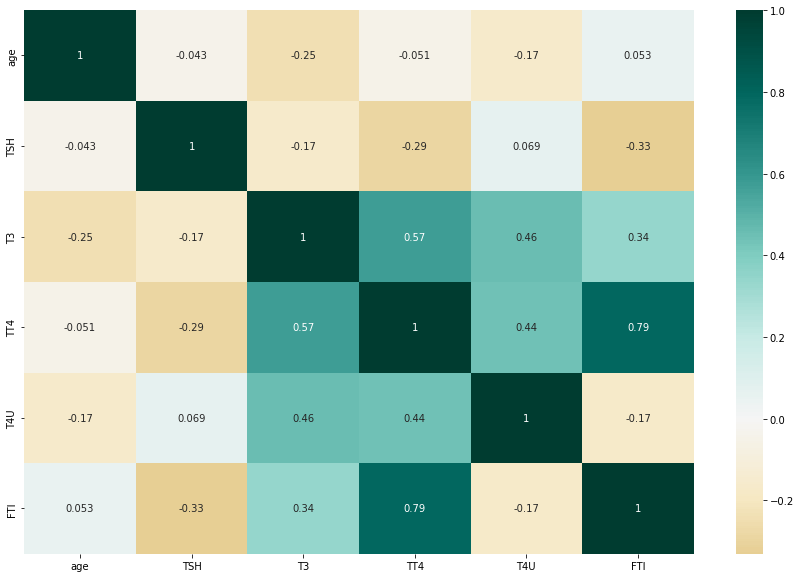

In [44]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(num_features.corr(),annot=True,cmap='BrBG',center=0)

In [45]:
# we will try to select as minimum p_value we can
x_train2=x_train[['query_hypothyroid','on_thyroxine']]
x_test2=x_test[['query_hypothyroid','on_thyroxine']]

In [46]:
def rf(x_train,x_test,y_train,y_test):
    var=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    var.fit(x_train,y_train)
    ypred=var.predict(x_test)
    print('accuracy',accuracy_score(y_test,ypred))
    print(classification_report(ypred,y_test))

In [47]:
%%time
rf(x_train2,x_test2,y_train,y_test)

accuracy 0.9224952741020794
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96       529
           2       0.00      0.00      0.00         0

    accuracy                           0.92       529
   macro avg       0.33      0.31      0.32       529
weighted avg       1.00      0.92      0.96       529

Wall time: 375 ms


Observation:
We alredy got the great accuracy now we will try to impute some more informative variables.

In [48]:
x_train3=x_train[['query_hypothyroid','on_thyroxine','sex','psych','sick','pregnant','thyroid_surgery','I131_treatment','query_on_thyroxine','goitre']]
x_test3=x_test[['query_hypothyroid','on_thyroxine','sex','psych','sick','pregnant','thyroid_surgery','I131_treatment','query_on_thyroxine','goitre']]

In [49]:
def rf(x_train,x_test,y_train,y_test):
    var=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    var.fit(x_train,y_train)
    ypred=var.predict(x_test)
    print('accuracy',accuracy_score(y_test,ypred))
    print(classification_report(ypred,y_test))

In [50]:
%%time
rf(x_train3,x_test3,y_train,y_test)

accuracy 0.9224952741020794
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96       529
           2       0.00      0.00      0.00         0

    accuracy                           0.92       529
   macro avg       0.33      0.31      0.32       529
weighted avg       1.00      0.92      0.96       529

Wall time: 358 ms


# same process we are going to apply with robust scaled dataset 

In [51]:
catrb_features=drb[['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych']]
numrb_features=drb[['age','TSH','T3','TT4','T4U','FTI']]
youtcome=drb['Target']

In [52]:
x_train,x_test,y_train,y_test=train_test_split(catrb_features,youtcome,random_state=52,test_size=0.2)
frb_score=chi2(x_train,y_train)
frb_score

(array([ 6.27203728, 12.25480904,  1.62925051,  1.00848193,  3.88476938,
         2.79783394,  2.25631769,  1.83181887, 19.46468705,  0.51878749,
         0.75286511,  1.44404332,  0.32764519,  0.09025271,  5.72470839]),
 array([9.90995991e-02, 6.55936454e-03, 6.52775798e-01, 7.99199590e-01,
        2.74178804e-01, 4.23856614e-01, 5.20940889e-01, 6.08035394e-01,
        2.19110283e-04, 9.14744914e-01, 8.60704585e-01, 6.95243976e-01,
        9.54748013e-01, 9.92980913e-01, 1.25799522e-01]))

In [53]:
p_val=pd.Series(frb_score[1],index=x_train.columns)
p_val.sort_values(ascending=True,inplace=True)
p_val

query_hypothyroid            0.000219
on_thyroxine                 0.006559
sex                          0.099100
psych                        0.125800
sick                         0.274179
pregnant                     0.423857
thyroid_surgery              0.520941
I131_treatment               0.608035
query_on_thyroxine           0.652776
goitre                       0.695244
on_antithyroid_medication    0.799200
lithium                      0.860705
query_hyperthyroid           0.914745
tumor                        0.954748
hypopituitary                0.992981
dtype: float64

In [54]:
xrb_train2=x_train[['query_hypothyroid','on_thyroxine','sex']]
xrb_test2=x_test[['query_hypothyroid','on_thyroxine','sex']]

In [55]:
def rf(x_train,x_test,y_train,y_test):
    var=RandomForestClassifier(n_estimators=100,random_state=123,n_jobs=-1)
    var.fit(x_train,y_train)
    ypred=var.predict(x_test)
    print('accuracy',accuracy_score(y_test,ypred))
    print(classification_report(ypred,y_test))

In [56]:
%%time
rf(xrb_train2,xrb_test2,y_train,y_test)

accuracy 0.9224952741020794
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96       529
           2       0.00      0.00      0.00         0

    accuracy                           0.92       529
   macro avg       0.33      0.31      0.32       529
weighted avg       1.00      0.92      0.96       529

Wall time: 396 ms


# With F-Score we are getting almost same accuracy with less features.

# With Pycaret we can have the basic Idea of how different algorithms going ton work on this dataset

In [57]:
dmms.drop(dmms.index[(dmms["Target"] == 3)],axis=0,inplace=True)


In [58]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(dmms, target = 'Target', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Multiclass
3,Original data shape,"(2642, 22)"
4,Transformed data shape,"(2642, 22)"
5,Transformed train set shape,"(1849, 22)"
6,Transformed test set shape,"(793, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [59]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [60]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [61]:
# init setup on exp
exp.setup(dmms, target = 'Target', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Multiclass
3,Original data shape,"(2642, 22)"
4,Transformed data shape,"(2642, 22)"
5,Transformed train set shape,"(1849, 22)"
6,Transformed test set shape,"(793, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [62]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9189,0.6185,0.9189,0.8443,0.8800,0.0000,0.0000,1.2680
svm,SVM - Linear Kernel,0.9189,0.0000,0.9189,0.8443,0.8800,0.0000,0.0000,0.1720
ridge,Ridge Classifier,0.9189,0.0000,0.9189,0.8443,0.8800,0.0000,0.0000,0.1640
dummy,Dummy Classifier,0.9189,0.5000,0.9189,0.8443,0.8800,0.0000,0.0000,0.1650
knn,K Neighbors Classifier,0.9183,0.5078,0.9183,0.8447,0.8800,0.0047,0.0099,0.1900
rf,Random Forest Classifier,0.9183,0.5607,0.9183,0.8443,0.8798,-0.0008,-0.0017,0.3160
et,Extra Trees Classifier,0.9183,0.5611,0.9183,0.8480,0.8807,0.0103,0.0228,0.2850
lda,Linear Discriminant Analysis,0.9162,0.6064,0.9162,0.8499,0.8796,0.0072,0.0178,0.1770
xgboost,Extreme Gradient Boosting,0.9162,0.5780,0.9162,0.8441,0.8787,-0.0039,-0.0076,0.3930
gbc,Gradient Boosting Classifier,0.9156,0.5402,0.9156,0.8504,0.8796,0.0117,0.0239,0.3250


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [63]:
exp.compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9189,0.6185,0.9189,0.8443,0.8800,0.0000,0.0000,0.1750
svm,SVM - Linear Kernel,0.9189,0.0000,0.9189,0.8443,0.8800,0.0000,0.0000,0.1570
ridge,Ridge Classifier,0.9189,0.0000,0.9189,0.8443,0.8800,0.0000,0.0000,0.1590
dummy,Dummy Classifier,0.9189,0.5000,0.9189,0.8443,0.8800,0.0000,0.0000,0.1650
knn,K Neighbors Classifier,0.9183,0.5078,0.9183,0.8447,0.8800,0.0047,0.0099,0.1910
rf,Random Forest Classifier,0.9183,0.5607,0.9183,0.8443,0.8798,-0.0008,-0.0017,0.2690
et,Extra Trees Classifier,0.9183,0.5611,0.9183,0.8480,0.8807,0.0103,0.0228,0.2700
lda,Linear Discriminant Analysis,0.9162,0.6064,0.9162,0.8499,0.8796,0.0072,0.0178,0.1830
xgboost,Extreme Gradient Boosting,0.9162,0.5780,0.9162,0.8441,0.8787,-0.0039,-0.0076,0.1720
gbc,Gradient Boosting Classifier,0.9156,0.5402,0.9156,0.8504,0.8796,0.0117,0.0239,0.2990


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

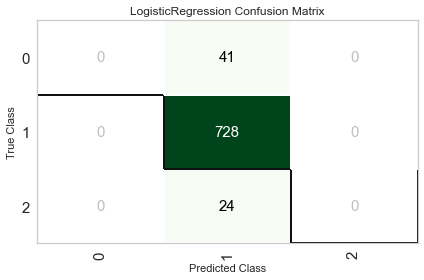

In [64]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

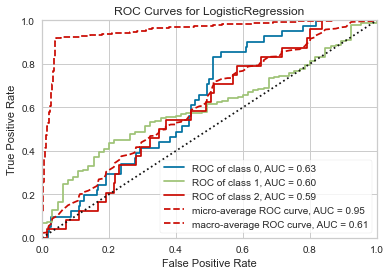

In [65]:
# plot AUC
plot_model(best, plot = 'auc')

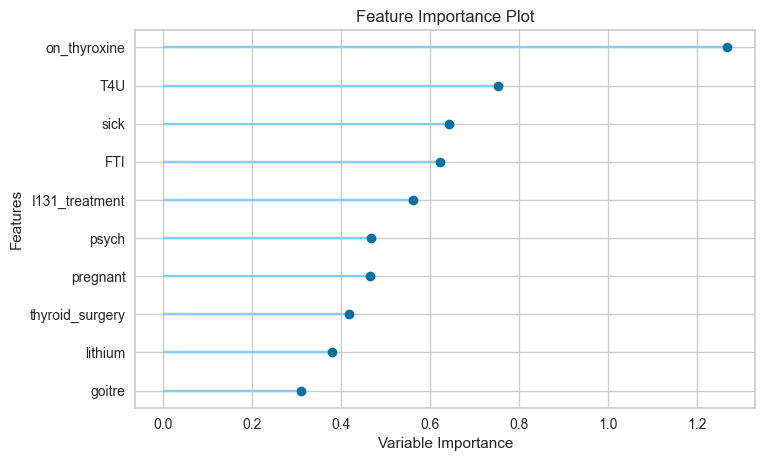

In [66]:
plot_model(best, plot = 'feature')


In [67]:
help(plot_model)


Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Union[dict, NoneType] = None, plot_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, use_train_data: bool = False, verbose: bool = True, display_format: Union[str, NoneType] = None) -> Union[str, NoneType]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List

In [68]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9180,0,0.9180,0.8428,0.8788,0.0000,0.0000


In [69]:

# show predictions df
holdout_pred.head()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,psych,age,TSH,T3,TT4,T4U,FTI,Target,prediction_label,prediction_score
683,0,0,0,0,0,0,0,0,0,0,...,0,0.035242,0.273578,0.136095,0.079439,0.668449,0.055980,1,1,0.9051
1785,0,0,0,0,0,0,1,0,0,0,...,0,0.165198,0.001745,0.242604,0.327103,0.449198,0.323155,1,1,0.9657
66,1,0,0,0,1,0,0,0,0,0,...,0,0.048458,0.000066,0.443787,0.301402,0.427807,0.312977,1,1,0.9290
2499,0,1,0,0,0,0,0,0,0,0,...,0,0.074890,0.004330,0.266272,0.189252,0.502674,0.170483,1,1,0.9783
645,1,0,0,0,0,0,0,0,0,0,...,0,0.019824,0.005462,0.467456,0.205607,0.459893,0.201018,1,1,0.9347


In [70]:
best = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9189,0.6185,0.9189,0.8443,0.8800,0.0000,0.0000,0.1750
svm,SVM - Linear Kernel,0.9189,0.0000,0.9189,0.8443,0.8800,0.0000,0.0000,0.1610
ridge,Ridge Classifier,0.9189,0.0000,0.9189,0.8443,0.8800,0.0000,0.0000,0.1570
dummy,Dummy Classifier,0.9189,0.5000,0.9189,0.8443,0.8800,0.0000,0.0000,0.1670
knn,K Neighbors Classifier,0.9183,0.5078,0.9183,0.8447,0.8800,0.0047,0.0099,0.1880
rf,Random Forest Classifier,0.9183,0.5607,0.9183,0.8443,0.8798,-0.0008,-0.0017,0.2690
et,Extra Trees Classifier,0.9183,0.5611,0.9183,0.8480,0.8807,0.0103,0.0228,0.2770
lda,Linear Discriminant Analysis,0.9162,0.6064,0.9162,0.8499,0.8796,0.0072,0.0178,0.1710
xgboost,Extreme Gradient Boosting,0.9162,0.5780,0.9162,0.8441,0.8787,-0.0039,-0.0076,0.1860
gbc,Gradient Boosting Classifier,0.9156,0.5402,0.9156,0.8504,0.8796,0.0117,0.0239,0.3230


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [71]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm'])


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9183,0.5607,0.9183,0.8443,0.8798,-0.0008,-0.0017,0.2670
et,Extra Trees Classifier,0.9183,0.5611,0.9183,0.8480,0.8807,0.0103,0.0228,0.2760
xgboost,Extreme Gradient Boosting,0.9162,0.5780,0.9162,0.8441,0.8787,-0.0039,-0.0076,0.1750
gbc,Gradient Boosting Classifier,0.9156,0.5402,0.9156,0.8504,0.8796,0.0117,0.0239,0.3310
lightgbm,Light Gradient Boosting Machine,0.9151,0.5685,0.9151,0.8493,0.8791,0.0058,0.0147,0.2110
dt,Decision Tree Classifier,0.8296,0.4900,0.8296,0.8468,0.8380,-0.0072,-0.0076,0.1690


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [72]:
compare_tree_models


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

# We will do one more iteration with datarb dataset

In [73]:
drb.drop(drb.index[(drb["Target"] == 3)],axis=0,inplace=True)

In [74]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(dmms, target = 'Target', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Multiclass
3,Original data shape,"(2642, 22)"
4,Transformed data shape,"(2642, 22)"
5,Transformed train set shape,"(1849, 22)"
6,Transformed test set shape,"(793, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [75]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [76]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [77]:
# init setup on exp
exp.setup(drb, target = 'Target', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Multiclass
3,Original data shape,"(2642, 22)"
4,Transformed data shape,"(2642, 22)"
5,Transformed train set shape,"(1849, 22)"
6,Transformed test set shape,"(793, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [78]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9189,0.6185,0.9189,0.8443,0.8800,0.0000,0.0000,0.1630
svm,SVM - Linear Kernel,0.9189,0.0000,0.9189,0.8443,0.8800,0.0000,0.0000,0.1580
ridge,Ridge Classifier,0.9189,0.0000,0.9189,0.8443,0.8800,0.0000,0.0000,0.1590
dummy,Dummy Classifier,0.9189,0.5000,0.9189,0.8443,0.8800,0.0000,0.0000,0.1800
knn,K Neighbors Classifier,0.9183,0.5078,0.9183,0.8447,0.8800,0.0047,0.0099,0.1870
rf,Random Forest Classifier,0.9183,0.5607,0.9183,0.8443,0.8798,-0.0008,-0.0017,0.2660
et,Extra Trees Classifier,0.9183,0.5611,0.9183,0.8480,0.8807,0.0103,0.0228,0.3180
lda,Linear Discriminant Analysis,0.9162,0.6064,0.9162,0.8499,0.8796,0.0072,0.0178,0.1820
xgboost,Extreme Gradient Boosting,0.9162,0.5780,0.9162,0.8441,0.8787,-0.0039,-0.0076,0.1940
gbc,Gradient Boosting Classifier,0.9156,0.5402,0.9156,0.8504,0.8796,0.0117,0.0239,0.3430


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [79]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9189,0.6096,0.9189,0.8443,0.8800,0.0000,0.0000,0.2020
ridge,Ridge Classifier,0.9189,0.0000,0.9189,0.8443,0.8800,0.0000,0.0000,0.1830
dummy,Dummy Classifier,0.9189,0.5000,0.9189,0.8443,0.8800,0.0000,0.0000,0.1980
rf,Random Forest Classifier,0.9183,0.5649,0.9183,0.8443,0.8798,-0.0008,-0.0017,0.3240
et,Extra Trees Classifier,0.9183,0.5611,0.9183,0.8480,0.8807,0.0103,0.0228,0.4150
knn,K Neighbors Classifier,0.9167,0.4788,0.9167,0.8446,0.8792,0.0024,0.0059,0.2120
lda,Linear Discriminant Analysis,0.9162,0.6064,0.9162,0.8499,0.8796,0.0072,0.0178,0.2440
xgboost,Extreme Gradient Boosting,0.9162,0.5778,0.9162,0.8441,0.8787,-0.0039,-0.0076,0.2240
lightgbm,Light Gradient Boosting Machine,0.9162,0.5667,0.9162,0.8494,0.8796,0.0071,0.0160,0.2840
gbc,Gradient Boosting Classifier,0.9151,0.5404,0.9151,0.8503,0.8793,0.0109,0.0222,0.3850


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

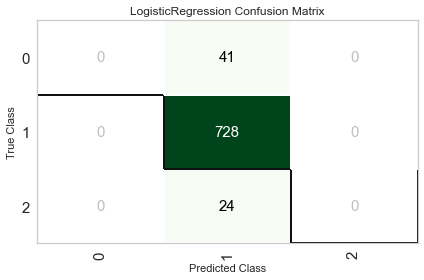

In [80]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

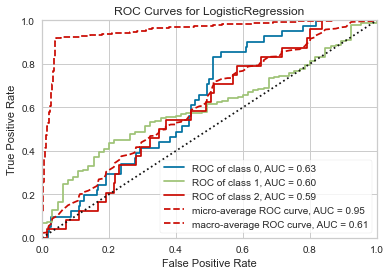

In [81]:
# plot AUC
plot_model(best, plot = 'auc')

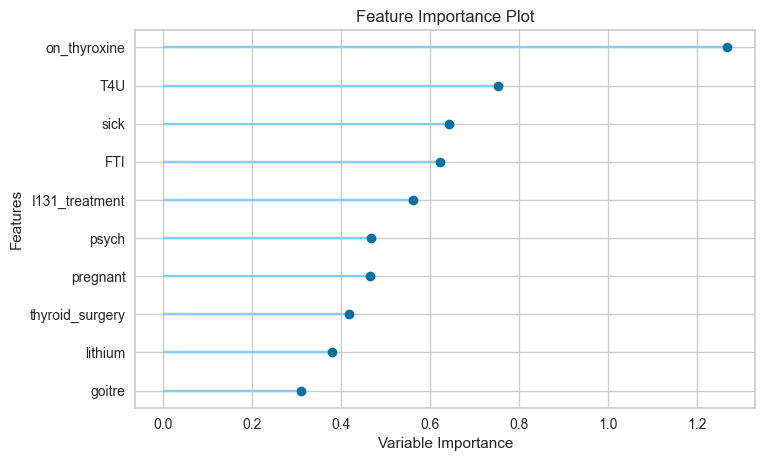

In [82]:
plot_model(best, plot = 'feature')


In [83]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Union[dict, NoneType] = None, plot_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, use_train_data: bool = False, verbose: bool = True, display_format: Union[str, NoneType] = None) -> Union[str, NoneType]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List

In [84]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9180,0,0.9180,0.8428,0.8788,0.0000,0.0000


In [85]:
holdout_pred.head()

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,psych,age,TSH,T3,TT4,T4U,FTI,Target,prediction_label,prediction_score
683,0,0,0,0,0,0,0,0,0,0,...,0,0.035242,0.273578,0.136095,0.079439,0.668449,0.055980,1,1,0.9051
1785,0,0,0,0,0,0,1,0,0,0,...,0,0.165198,0.001745,0.242604,0.327103,0.449198,0.323155,1,1,0.9657
66,1,0,0,0,1,0,0,0,0,0,...,0,0.048458,0.000066,0.443787,0.301402,0.427807,0.312977,1,1,0.9290
2499,0,1,0,0,0,0,0,0,0,0,...,0,0.074890,0.004330,0.266272,0.189252,0.502674,0.170483,1,1,0.9783
645,1,0,0,0,0,0,0,0,0,0,...,0,0.019824,0.005462,0.467456,0.205607,0.459893,0.201018,1,1,0.9347


In [86]:
best = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9189,0.6185,0.9189,0.8443,0.8800,0.0000,0.0000,0.2140
svm,SVM - Linear Kernel,0.9189,0.0000,0.9189,0.8443,0.8800,0.0000,0.0000,0.1900
ridge,Ridge Classifier,0.9189,0.0000,0.9189,0.8443,0.8800,0.0000,0.0000,0.1930
dummy,Dummy Classifier,0.9189,0.5000,0.9189,0.8443,0.8800,0.0000,0.0000,0.2630
knn,K Neighbors Classifier,0.9183,0.5078,0.9183,0.8447,0.8800,0.0047,0.0099,0.2300
rf,Random Forest Classifier,0.9183,0.5607,0.9183,0.8443,0.8798,-0.0008,-0.0017,0.3460
et,Extra Trees Classifier,0.9183,0.5611,0.9183,0.8480,0.8807,0.0103,0.0228,0.3480
lda,Linear Discriminant Analysis,0.9162,0.6064,0.9162,0.8499,0.8796,0.0072,0.0178,0.2020
xgboost,Extreme Gradient Boosting,0.9162,0.5780,0.9162,0.8441,0.8787,-0.0039,-0.0076,0.2150
gbc,Gradient Boosting Classifier,0.9156,0.5402,0.9156,0.8504,0.8796,0.0117,0.0239,0.3940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# Observation on both the datasets:
    - Both are working similar.
    - But still we need to fit final model on both the datasets in final model building
    - We need to look on to some feature selection before final model building
    - We also need to look to handle imbalanced datasets as targetb variable is ighly impure.
    - lr,svm,rf,knn,ridhe are the selected algorithms to go with hyperparameter tuning
    - After testing all five models with hyperparameter tuning we will do cross validation and select the best algorithm

# Operations on dmms 

In [87]:
# Saving best parameters in for further operations
dataone=dmms[['query_hypothyroid','on_thyroxine','sick','I131_treatment','pregnant','thyroid_surgery','lithium','age','TSH','TT4','T3','T4U','FTI']]

In [88]:
dataone

,query_hypothyroid,on_thyroxine,sick,I131_treatment,pregnant,thyroid_surgery,lithium,age,TSH,TT4,T3,T4U,FTI
0,0,0,0,0,0,0,0,0.151982,0.001500,0.186916,0.207101,0.278075,0.267176
1,0,0,0,0,0,0,0,0.180617,0.003387,0.228972,0.278107,0.411765,0.244275
2,0,0,0,0,0,0,0,0.118943,0.000368,0.116822,0.207101,0.374332,0.134860
3,0,0,0,0,0,0,0,0.154185,0.000047,0.394860,0.443787,0.470588,0.379135
4,0,0,0,0,0,0,0,0.057269,0.002821,0.420561,0.254438,0.598930,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,0,0,0,0,0,0,0,0.174009,0.004708,0.257009,0.207101,0.395722,0.282443
2639,0,0,0,0,0,0,0,0.103524,0.002255,0.184579,0.289941,0.352941,0.221374
2640,0,0,0,0,0,0,0,0.138767,0.000085,0.390187,0.360947,0.513369,0.351145
2641,0,0,0,0,0,0,0,0.059471,0.004142,0.186916,0.254438,0.368984,0.216285


In [89]:
# handling imbalanced data 
dataone['Target']=youtcome

In [90]:
y=dataone['Target']
x=dataone.drop(['Target'],axis=1)


In [91]:
x.shape, y.shape

((2642, 13), (2642,))

In [92]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X,Y = oversample.fit_resample(x,y)
X.shape , Y.shape

((7281, 13), (7281,))

In [93]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=52)

In [94]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5460, 13)
(1821, 13)
(5460,)
(1821,)


# Model Building testing with rf,knn,svm,ridge,lr Algorithms

In [95]:
def rf(x_train,x_test,y_train,y_test):
    var=RandomForestClassifier()
    var.fit(x_train,y_train)
    ypred=var.predict(x_test)
    print('accuracy',accuracy_score(y_test,ypred))
    print(classification_report(ypred,y_test))

In [96]:
%%time
rf(x_train,x_test,y_train,y_test)

accuracy 0.9335529928610653
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       653
           1       0.88      0.94      0.91       557
           2       0.95      0.93      0.94       611

    accuracy                           0.93      1821
   macro avg       0.93      0.93      0.93      1821
weighted avg       0.94      0.93      0.93      1821

Wall time: 2.14 s


In [97]:
def svc(x_train,x_test,y_train,_test):
    classifier = SVC(kernel='poly', random_state=0)  
    classifier.fit(x_train,y_train)
    ypred=classifier.predict(x_test)
    print('accuracy',accuracy_score(y_test,ypred))
    print(classification_report(ypred,y_test))


In [98]:
%%time
svc(x_train,x_test,y_train,y_test)

accuracy 0.44810543657331137
              precision    recall  f1-score   support

           0       0.45      0.49      0.47       585
           1       0.13      0.75      0.22       103
           2       0.76      0.40      0.53      1133

    accuracy                           0.45      1821
   macro avg       0.45      0.54      0.40      1821
weighted avg       0.63      0.45      0.49      1821

Wall time: 3.13 s


In [99]:
def lr(x_train,x_test,y_train,y_test):
    logreg = LogisticRegression(penalty='elasticnet',max_iter=100,random_state=0,solver='saga',l1_ratio=0.5)
    logreg.fit(x_train, y_train)
    ypred=logreg.predict(x_test)
    print('accuracy',accuracy_score(y_test,ypred))
    print(classification_report(ypred,y_test))


In [100]:
lr(x_train,x_test,y_train,y_test)

accuracy 0.37891268533772654
              precision    recall  f1-score   support

           0       0.45      0.35      0.40       808
           1       0.24      0.49      0.32       291
           2       0.44      0.36      0.40       722

    accuracy                           0.38      1821
   macro avg       0.38      0.40      0.37      1821
weighted avg       0.41      0.38      0.39      1821



In [101]:
def knn(x_train,x_test,y_train,y_test):
    knn=knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1,weights='distance',algorithm='brute')
    knn.fit(x_train,y_train)
    ypred=knn.predict(x_test)
    print('accuracy',accuracy_score(y_test,ypred))
    print(classification_report(ypred,y_test))
    

In [102]:
%%time
knn(x_train,x_test,y_train,y_test)

accuracy 0.8396485447556288
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       761
           1       0.57      0.94      0.71       360
           2       0.97      0.82      0.89       700

    accuracy                           0.84      1821
   macro avg       0.84      0.86      0.83      1821
weighted avg       0.89      0.84      0.85      1821

Wall time: 538 ms


In [103]:
def ridge(x_train,y_train,x_test,y_test):
    rdgclassifier = RidgeClassifier(random_state=100)
    rdgclassifier.fit(x_train, y_train)
    ypred=rdgclassifier.predict(x_test)
    print('accuracy',accuracy_score(y_test,ypred))
    print(classification_report(ypred,y_test))
    

In [104]:
%%time
ridge(x_train,y_train,x_test,y_test)

accuracy 0.3871499176276771
              precision    recall  f1-score   support

           0       0.43      0.36      0.39       759
           1       0.26      0.51      0.34       299
           2       0.47      0.37      0.41       763

    accuracy                           0.39      1821
   macro avg       0.39      0.41      0.38      1821
weighted avg       0.42      0.39      0.39      1821

Wall time: 35 ms


# Observation
- Best performing model is random forest model
- Now we will check with doing some hyperparameter tuning
- Final model building
- Graphical representation of performance
- Cross validation on final model building

# Final Model Building With HyperParameter Tuning using cross validation
   - Random Forest Classification Algorithm

In [105]:
from sklearn.model_selection import cross_val_score
def Testrandomparams(**params):
    score = cross_val_score(RandomForestClassifier(**params, n_jobs=-1), x_train, y_train, cv= 5, scoring="accuracy")
    print("Accuracy applying  {} is {}".format(params, round(np.mean(score), 4)))

In [106]:
estimators = [50,80,100,123,150,200]
for n in estimators:
    Testrandomparams(n_estimators=n)

Accuracy applying  {'n_estimators': 50} is 0.9114
Accuracy applying  {'n_estimators': 80} is 0.9136
Accuracy applying  {'n_estimators': 100} is 0.917
Accuracy applying  {'n_estimators': 123} is 0.9137
Accuracy applying  {'n_estimators': 150} is 0.9147
Accuracy applying  {'n_estimators': 200} is 0.9192


In [107]:
max_features = ['sqrt','log2','auto']
for n in max_features:
    Testrandomparams(n_estimators=200, max_features=n)


Accuracy applying  {'n_estimators': 200, 'max_features': 'sqrt'} is 0.9139
Accuracy applying  {'n_estimators': 200, 'max_features': 'log2'} is 0.9134
Accuracy applying  {'n_estimators': 200, 'max_features': 'auto'} is 0.9183


In [108]:
max_depth = [1,2,3,6,None]
for n in max_depth:
    Testrandomparams(n_estimators=200,max_features='auto',max_depth=n)


Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 1} is 0.4454
Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 2} is 0.4804
Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 3} is 0.5137
Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 6} is 0.6366
Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': None} is 0.9189


In [109]:
max_leaf_nodes=[2,3,6,None]
for n in max_leaf_nodes:
    Testrandomparams(n_estimators=200,max_features='auto',max_depth=None,max_leaf_nodes=n)


Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': None, 'max_leaf_nodes': 2} is 0.4533
Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': None, 'max_leaf_nodes': 3} is 0.4665
Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': None, 'max_leaf_nodes': 6} is 0.4971
Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': None, 'max_leaf_nodes': None} is 0.9203


In [110]:
random_state =[52,68,100,123,150,None]
for n in random_state:
    Testrandomparams(n_estimators=200,max_features='auto',max_depth=None,max_leaf_nodes=None,random_state=n)

Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': None, 'max_leaf_nodes': None, 'random_state': 52} is 0.9174
Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': None, 'max_leaf_nodes': None, 'random_state': 68} is 0.9176
Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': None, 'max_leaf_nodes': None, 'random_state': 100} is 0.9126
Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': None, 'max_leaf_nodes': None, 'random_state': 123} is 0.915
Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': None, 'max_leaf_nodes': None, 'random_state': 150} is 0.9185
Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': None, 'max_leaf_nodes': None, 'random_state': None} is 0.9185


In [111]:
criterion=['gini','entropy',None]
for n in criterion:
    Testrandomparams(n_estimators=200,max_features='auto',max_depth=None,max_leaf_nodes=None,random_state=150,criterion=n)

Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': None, 'max_leaf_nodes': None, 'random_state': 150, 'criterion': 'gini'} is 0.9185
Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': None, 'max_leaf_nodes': None, 'random_state': 150, 'criterion': 'entropy'} is 0.9181
Accuracy applying  {'n_estimators': 200, 'max_features': 'auto', 'max_depth': None, 'max_leaf_nodes': None, 'random_state': 150, 'criterion': None} is nan


In [112]:
model=RandomForestClassifier(n_estimators=200,max_features='auto',max_depth=None,max_leaf_nodes=None,random_state=150,criterion='gini')
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=150, verbose=0, warm_start=False)

In [113]:
y_pred=model.predict(x_test)
print('Accuracy Score = ',(accuracy_score(y_pred,y_test))*100,end='\n')
print("Classification Report :",end='\n')
print(classification_report(y_pred,y_test))

Accuracy Score =  93.62987369577156
Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       654
           1       0.88      0.95      0.91       550
           2       0.96      0.92      0.94       617

    accuracy                           0.94      1821
   macro avg       0.94      0.94      0.94      1821
weighted avg       0.94      0.94      0.94      1821



In [114]:
# Feature Importance
importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
importances

,Feature,Importance
10,T3,0.175991
7,age,0.160488
11,T4U,0.154070
8,TSH,0.151159
12,FTI,0.151097
9,TT4,0.147488
1,on_thyroxine,0.021430
0,query_hypothyroid,0.018876
2,sick,0.011642
4,pregnant,0.002683


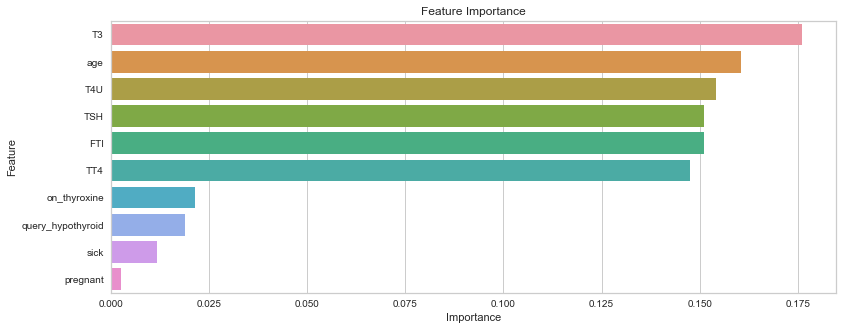

In [115]:
plt.figure(figsize=(13,5))
plt.title('Feature Importance')
sns.barplot(data=importances.head(10), x='Importance', y='Feature');

# Observation:
    - We have used cross validation technique to co-relate the accuracy with testing and did hyperparameter tuning as well.
    - Also see the classification report of it and confusion matrix.
    - At last tried to see some feature importance graphs.
    - Dataset dmms and drb performing similar. So, we checked with dmms.

# THANKYOU

<AxesSubplot:xlabel='Target', ylabel='Density'>

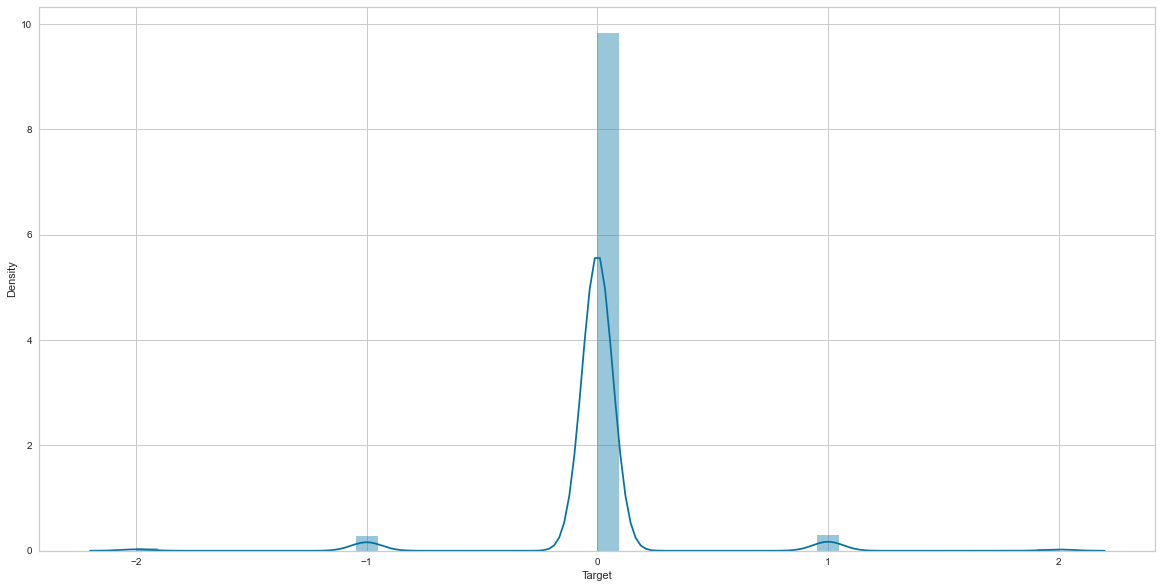

In [122]:
plt.figure(figsize=(20,10))
sns.distplot(y_test-y_pred)

In [124]:
!pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [125]:
import xgboost as xgb

In [131]:
xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(x_train,y_train)

predictions = xgb_classifier.predict(x_test)
print(accuracy_score(predictions,y_test))
print(classification_report(predictions,y_test))

0.942339373970346
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       621
           1       0.95      0.93      0.94       604
           2       0.94      0.94      0.94       596

    accuracy                           0.94      1821
   macro avg       0.94      0.94      0.94      1821
weighted avg       0.94      0.94      0.94      1821



In [190]:
# checking with ada boost algorihm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_train,y_train)
pred=model.predict((x_test))
print(accuracy_score(pred,y_test))
print(classification_report(pred,y_test))

0.5238879736408567
              precision    recall  f1-score   support

           0       0.48      0.49      0.49       615
           1       0.50      0.54      0.52       546
           2       0.60      0.54      0.57       660

    accuracy                           0.52      1821
   macro avg       0.52      0.52      0.52      1821
weighted avg       0.53      0.52      0.52      1821



In [189]:
# checking with xtratree classifier algorithm
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
et_pred=et.predict(x_test)
print(accuracy_score(et_pred,y_test))
print(classification_report(et_pred,y_test))

0.9346512904997254
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       662
           1       0.87      0.94      0.91       548
           2       0.96      0.94      0.95       611

    accuracy                           0.93      1821
   macro avg       0.93      0.94      0.93      1821
weighted avg       0.94      0.93      0.94      1821



In [179]:
# Import Sklearn Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
models = {'XGBoost':xgb.XGBClassifier(),
          'RandomForestClassifier':RandomForestClassifier(),
         'Xtra tree classifier':ExtraTreesClassifier(),
         'KNN classifier':KNeighborsClassifier()}

def evaluate(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    # Creating One Dictionary to Save Model Score
    model_score = {}
    for name,model in models.items():
        model.fit(x_train, y_train)
        model_score[name] = model.score(x_test,y_test)
    return model_score

In [180]:
model_score = evaluate(models = models ,x_train = x_train,x_test = x_test,y_train = y_train,y_test = y_test)
model_score

{'XGBoost': 0.942339373970346,
 'RandomForestClassifier': 0.9368478857770456,
 'Xtra tree classifier': 0.9313563975837452,
 'KNN classifier': 0.8220757825370676}

In [181]:
model_comparison = pd.DataFrame(model_score,index = ['Accuracy'])
model_comparison.sort_values(by = 'Accuracy',axis = 1,ascending= False)

,XGBoost,RandomForestClassifier,Xtra tree classifier,KNN classifier
Accuracy,0.942339,0.936848,0.931356,0.822076


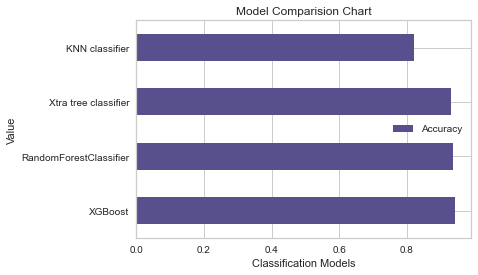

In [182]:
# Model Comparison Graphical Representation

model_comparison.T.plot(kind = 'barh',color='#58508d')
plt.title('Model Comparision Chart')
plt.xlabel('Classification Models')
plt.ylabel('Value')
plt.xticks(rotation = 0)
plt.show()

# 3D Plotting of Classification report of Each Algorithm
- First to plot in 3d we need to gather the data from classification report.
- e.g. precision value would be 0,1,2 values and weighted average value.
- for all four algorithm we will do this.

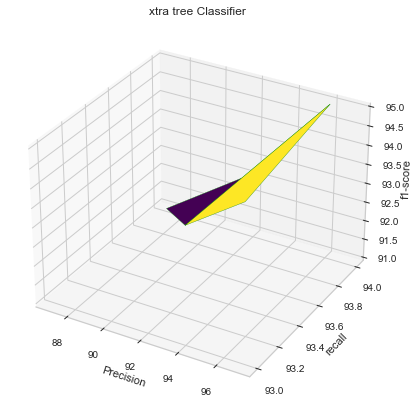

In [218]:
precision_xt=[97,87,96,93,94]
recall_xt=[93,94,94,94,93]
f1_xt=[95,91,95,93,94]
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(precision_xt, recall_xt, f1_xt,
                cmap='viridis', edgecolor='green');
ax.set_xlabel('Precision')
ax.set_ylabel('recall')
ax.set_zlabel('f1-score')
ax.set_title('xtra tree Classifier')
plt.show()

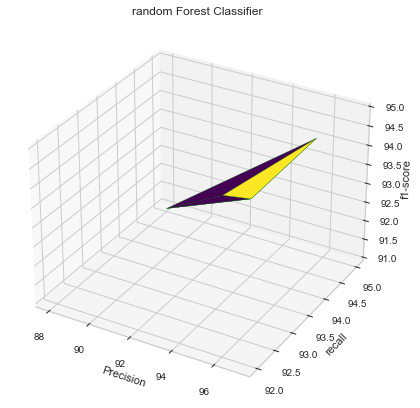

In [219]:
precision_xt=[97,88,96,94,94]
recall_xt=[94,95,92,94,94]
f1_xt=[95,91,95,93,94]
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(precision_xt, recall_xt, f1_xt,
                cmap='viridis', edgecolor='green');
ax.set_xlabel('Precision')
ax.set_ylabel('recall')
ax.set_zlabel('f1-score')
ax.set_title('random Forest Classifier')
plt.show()

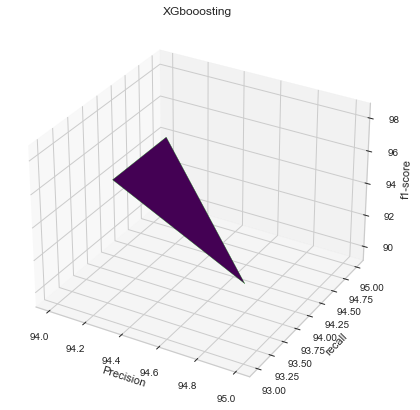

In [222]:
precision_xt=[94,95,94,94,94]
recall_xt=[95,93,94,94,94]
f1_xt=[94,94,94,94,94]
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(precision_xt, recall_xt, f1_xt,
                cmap='viridis', edgecolor='green');
ax.set_xlabel('Precision')
ax.set_ylabel('recall')
ax.set_zlabel('f1-score')
ax.set_title('XGbooosting')
plt.show()

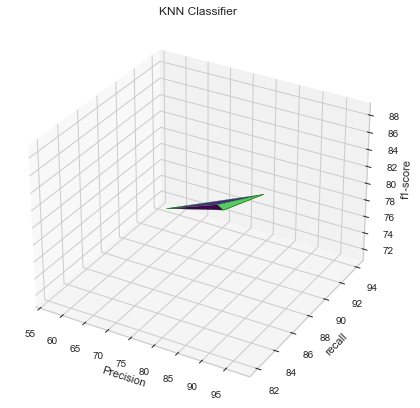

In [226]:
precision_xt=[97,57,97,84,89]
recall_xt=[84,94,82,86,84]
f1_xt=[88,71,89,83,85]
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(precision_xt, recall_xt, f1_xt,
                cmap='viridis', edgecolor='green');
ax.set_xlabel('Precision')
ax.set_ylabel('recall')
ax.set_zlabel('f1-score')
ax.set_title('KNN Classifier')
plt.show()